In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

C:\Users\ASUS\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ASUS\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
from sklearn.datasets import load_boston

C:\Users\ASUS\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
dataset=boston.data
for name,index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [11]:
data=dataset[:,12].reshape(-1,1)

In [13]:
np.shape(dataset)

(506, 13)

In [14]:
target=boston.target.reshape(-1,1)

In [15]:
np.shape(target)

(506, 1)

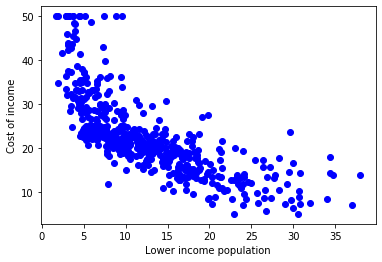

In [17]:
%matplotlib inline
plt.scatter(data,target,color='blue')
plt.xlabel('Lower income population')
plt.ylabel('Cost of income')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg=LinearRegression()
reg.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pred=reg.predict(data)

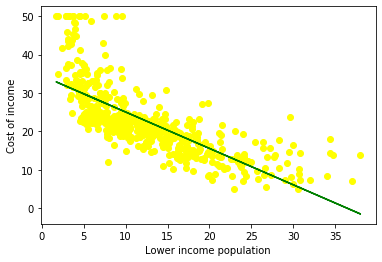

In [21]:
%matplotlib inline
plt.scatter(data,target,color='yellow')
plt.plot(data,pred,color='green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of income')
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [32]:
model=make_pipeline(PolynomialFeatures(3),reg)

In [33]:
model.fit(data,target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [34]:
pred=model.predict(data)

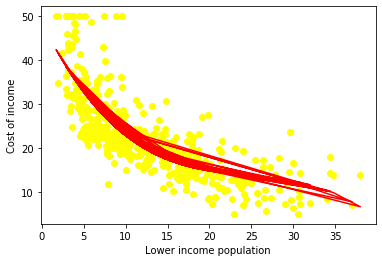

In [35]:
%matplotlib inline
plt.scatter(data,target,color='yellow')
plt.plot(data,pred,color='red')
plt.xlabel('Lower income population')
plt.ylabel('Cost of income')
plt.show()

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(pred,target)

0.4798911810275662